# Day 3 (Vector and matrix operation, and statistical processing)

## Content 

* mathematical module
* numpy module
* Vector and matrix operation
* Statistical processing

## Library `math`
- It has the fixed value $\pi$ and functions `sin`, `cos`, `tan`, `exp`, `log` etc.
- Please see the following example.

In [ ]:
import math

print(math.pi)
print(math.sin(math.pi * 0.5))
et = math.exp(2.0)
print(et)
print(math.log(et))


### Practice
- Try to use such functions.

## Explanation: Mathematical functions
*  `math.pi` returns the value of $\pi$
*  `math.e` returns the value of $e$
*  `math.exp(x)` returns the value of $e^x$
*  `math.log(x)` returns the value of $\ln(x)$; however, if the base is specified, e.g. `math.log(et,math.e**2)`, it returns the logarithm of $x$ with respect to the base specified. In the example, it is $\log_{e^2}(et)$

In [ ]:
# Make a program: Use math library
import math

print(math.pi)
print(math.sin(math.pi * 0.5))
et = math.exp(2.0)
print(et)
print(math.log(et))
print(math.log(et,math.e**2))

3.141592653589793
1.0
7.38905609893065
2.0
1.0


## Bisection method

### Assumption
- Assume that $f(x)$ is monotone increasing function.
- We solve $f(x) = 0$.
- For initial values $a$ and $b$, we have $f(a) < 0$ and $f(b) > 0$.
- The precision of answer is $\varepsilon$.
### Algorithm
0. $x = (a + b) / 2$
0. If $b - a < \varepsilon$, stop the algorithrm and $x$ is answer.
0. If $f(x) > 0$, let $b = x$.
0. If $f(x) < 0$, let $a = x$.
0. If $f(x) = 0$, stop the algorithrm and $x$ is answer.
0. Go to 1. 


### Practice
- Solve the following by bisection method.
$$
\sin(x) + x - 1 = 0
$$
- The lower initila value is 0 and the upper initial value $\pi / 2$.
- $\varepsilon = 10^{-6}$

## Practice of using mathematical description by Markdown
- Functions, fraction, subscription, superscription, sum, integral, large parenthesis. 
$$f(x)=\sum_{i=0}^{n}\Big(\frac{x_i}{x_{i+1}^2}\Big)+\int_{0}^{n}ydy$$
- In line. $x=5$

## Explanation: Bisection method
The bisection method aka **binary search** can be implement both iteratively and recursively. The program below provides source code for both implementations.

While we can observe different results between two implementations, their implication, or rather their accuracies, are practically the same. The iterative implementation returns left or right border value depending on the last **sectioning**, while the recursive implementation always returns the left border (for simplicity).

**Note:** I personally prefer to write this algorithm recursively; therefore, I include it in this report.

In [ ]:
# Make a program: bisection method
import math
def f(x):
  return math.sin(x)+x-1.0

#resursive binary search
def bsearch(l,r,epsilon):
  if (r-l<epsilon): return l
  m=(l+r)/2
  if (now>0.0): return bsearch(l,m,epsilon)
  elif (now<0.0): return bsearch(m,r,epsilon)
  else: return m

#iterative
a=0.0
b=math.pi
epsilon=1.0e-6
x=0.0
while (b-a>epsilon):
  x=(a+b)/2
  now=f(x)
  if (now>0.0): b=x
  elif (now<0.0): a=x
  else: break
print("ans =", x, "f(x) =", f(x))

#recursive
ans=bsearch(a,b,epsilon)
print("ans =", ans, "f(x) =", f(ans))

ans = 0.5109736443318578 f(x) = 4.024316206940881e-07
ans = 0.5109728953178012 f(x) = -9.999241525893154e-07


# Vector and matrix calculation

## Vector and matrix operation

* <font color="blue">{Major part of numerical analysis is the calculation of linear algebra.}</font>
  * Structure analysis and Fluid analysis
  * Electromagnetic analysis and circuit analysis
  * Statistical processing and image processing.
* Recent computers are designed to accelerate vector operations.
  * Vector processor (Super computer)
  * Operations for vector processing in CPU.   
  SIMD: Single instruction multiple data
     * SSE: Streaming Single instruction multiple data Extensions
     * AVX: Advanced Vector eXtensions
  * GPU (Graphics Processing Unit)
* Expressions of vector and matrix in Python.
 * 1-dimensional array : vector
 * 2-dimensional array : matrix
 * $n$-dimensional array ($n \leq 2$) : tensor
* In order to accelerate the calculation, the amount of program for the matrix multiplication become longer and longer.   
<font color="orange">$\Rightarrow$ Use libraries.  
 * BLAS (Basic Linear Algebra Subprograms) 
 * LAPACK (Linner Algebra Package)

## Library `numpy`
- ndarray (array of numpy) is similar to list.
- Calulation of np.array is faster than them.
- `dtype` should be set if it is not `int`. Mix of type is not allowed.

## Explanation: Numpy utilities
*  `array` can be used to declare numpy array. It can be printed directly similar to ordinary python lists.
*  `size` returns the number of elements in the vector/matrix/tensor. For example, if the dimension of a matrix is 3x5, the function returns 15.
*  `len` returns the number of elements in the array. If the array is a matrix, the function returns the number of row instead.
*  `shape` returns a pair containing the number of row and column of a matrix (array), respectively.
*  To access $A_{ij}$, we can use either `A[i,j]` or `A[i][j]`. This is demonstrated in the program below.
*  We can use index slicing as we can do with ordinary python lists. For example, we can use `A[0:2,1:3]` to extract a 2x2 sub-matrix with the specified indices.
*  `zeros()` and `ones()` are used to generate an array with a specified shape , having elements with value of zero and one, respectively.

In [ ]:
import numpy as np

v1 = np.array([1, 2, 3, 4, 5], dtype='float64')
v2 = np.array([2, -1, 3, 3, -2], dtype = 'float64')
m1 = np.array([[5, 3, -1, 4, 5],[1, 4, 5, 3, 2],[-1, 0, 5, 2, 2]], dtype='float64')
m2 = np.array([[1, 3, -2],[1, -2, 5]], dtype='float64')
print(v1)
print(m1)

# Size
print("v1.size = {0}".format(v1.size))
print("m1.size = {0}".format(m1.size))

# Len
print("len(v1) = {0}".format(len(v1)))
print("len(m1) = {0}".format(len(m1)))

# Shape
print("v1.shape = {0}".format(v1.shape))
print("m1.shape = {0}".format(m1.shape))

(rowM1, colM1) = m1.shape

print("Number of rows of m1 = {0}".format(rowM1))
print("Number of columns of m1 = {0}".format(colM1))

# An element
print("v1[2] = {0}".format(v1[2]))
print("m1[1,2] = {0}".format(m1[1,2]))
print("m1[1,2] = {0}".format(m1[1][2]))

# Extract elements
print("m1[0:2,1:3] = {0}".format(m1[0:2,1:3]))

# Make zero matrix
print("np.zeros(2) = {0}".format(np.zeros(2)))
print("np.zeros((2, 3)) = {0}".format(np.zeros((2, 3))))

# Make a matrix with all elements 1
print("np.ones(2) = {0}".format(np.ones(2)))
print("np.ones((2, 3)) = {0}".format(np.ones((2, 3))))


[1. 2. 3. 4. 5.]
[[ 5.  3. -1.  4.  5.]
 [ 1.  4.  5.  3.  2.]
 [-1.  0.  5.  2.  2.]]
v1.size = 5
m1.size = 15
len(v1) = 5
len(m1) = 3
v1.shape = (5,)
m1.shape = (3, 5)
Number of rows of m1 = 3
Number of columns of m1 = 5
v1[2] = 3.0
m1[1,2] = 5.0
m1[1,2] = 5.0
m1[0:2,1:3] = [[ 3. -1.]
 [ 4.  5.]]
np.zeros(2) = [0. 0.]
np.zeros((2, 3)) = [[0. 0. 0.]
 [0. 0. 0.]]
np.ones(2) = [1. 1.]
np.ones((2, 3)) = [[1. 1. 1.]
 [1. 1. 1.]]


### Practice
- Calculate the innerproduct of `v1` and `v2` by using `for` sentence.
- Calculate the product of `m1` and `v1` by using `for` sentence.
- Calculate the product of `m2` and `m1` by using `for` sentence.

## Explanation: matrix multuplication

There is nothing required detailed explanation. Every operations is performed in accordance with its respective mathematical formula. Note that the indices $i$ and $j$ refer to row and column of elements in a vector/matrix, respectively..
*  **Inner product**
$$[u_i]_n\cdot[v_j]_n=\sum_{i=0}^{n}u_iv_i$$
*  **Matrix and vector**
$$[A_{ij}]_{m\times n} [u_i]_n= [A_{ij}u_j]_{m\times n}$$
*  **Matrix multiplication**
$$[A_{ij}]_{m\times n} [B_{ij}]_{n\times o}=[\sum_{k=0}^{n}A_{ik}B_{kj}]_{m\times o}$$

In [ ]:
# Make a program

# Inner product
n=len(v1)
ans1=0
for i in range(0,n):
  ans1+=v1[i]*v2[i]
print(ans1)

# Multiplicastion of a matrix and a vector
(m,n)=m1.shape
ans2=np.zeros(m)
for i in range(0,m):
  for j in range(0,n):
    ans2[i]+=m1[i,j]*v1[j]
print(ans2)

# Multiplicastion of a matrix and a matrix
(m,n)=m2.shape
(n,o)=m1.shape
ans3=np.zeros((m,o))
for i in range(0,m):
  for j in range(0,o):
    for k in range(0,n):
      ans3[i,j]+=m2[i,k]*m1[k,j]
print(ans3)


11.0
[49. 46. 32.]
[[10. 15.  4.  9.  7.]
 [-2. -5. 14.  8. 11.]]


### dot product
- Inner product and matrix multiplication can be done easily.

In [ ]:
print(np.dot(v1, v2))
print(v1.dot(v2))
print(v1)

11.0
11.0
[1. 2. 3. 4. 5.]


### Practice
- Try dot product for matrix and vector multiplication.
- Try dot product for matrix and matrix multiplication.

## Explanation: np.dot
There is explanation required, only simple application

In [ ]:
# Make a program: Use dot product
print(np.dot(m1,v1))
print(np.dot(m2,m1))

[49. 46. 32.]
[[10. 15.  4.  9.  7.]
 [-2. -5. 14.  8. 11.]]


### Practice
- Make functions to do selection sort in both ascending and descending orders for given data in ndarray.

## Explanation: Selection sort
This is the duplication of the task last week; therefore, it is not necessary to provide any explanation in this report. (Can refer to last week report)

In [ ]:
# Make a program sort ascending/descending orders
import numpy as np

def sortSelectAscend(ar):
    N = len(ar)
    for l in range(0, N-1):
        lMin = l
        for k in range(l+1, N):
            if (ar[lMin] > ar[k]):
                lMin = k
        ar[l], ar[lMin] = ar[lMin], ar[l]

def sortSelectDescend(ar):
    N = len(ar)
    for l in range(0, N-1):
        lMax = l
        for k in range(l+1, N):
            if (ar[lMax] < ar[k]):
                lMax = k
        ar[l], ar[lMax] = ar[lMax], ar[l]
                
ar1 = np.array([10, -2, 13, 42, 35, 23, -23, 12, 12])
print(ar1)
sortSelectAscend(ar1)
print(ar1)
sortSelectDescend(ar1)
print(ar1)

[ 10  -2  13  42  35  23 -23  12  12]
[-23  -2  10  12  12  13  23  35  42]
[ 42  35  23  13  12  12  10  -2 -23]


## Statistics
### Practice
- Calulate mean, variance, standard deviation, and median for given data in `ndarray` by using `for` sentence.
- Median : If the number of data $N$ is odd, the $(N+1)/2$-th largest data. If it is even, the average of $N$-th and $(N+1)$-th largest data.

## Explanation: Statistics calculation
The program calculates mean, median, variance, and standard deviation for a set of data, following the mathematical expressions below.
*  **Mean**
$$\bar{X}=\frac{\sum_{i=1}^{n}X_i}{n}$$
*  **Variance and standard deviation**
$$V=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$
Here, the fraction is $n-1$ instead of $n$ because the data is considered as a sample, not population. Note that the standard deviation is $\sqrt{V}$.
* **Median**
To find median according to the definition provided above, the selection sort is applied. Then, for simplicity, the median of list $A$ is calculated by

$$\text{Median}=\frac{1}{2}\Big(A_{\text{floor}(\frac{n+1}{2})}+A_{\text{ceil}(\frac{n+1}{2})}\Big)$$

In this manner, if $n$ is odd, the index of both terms become the same, resulting in the middle value. However, if $n$ is even, the index is different; therefore, the average of two elements closest to the middle is regarded as the median. Note that the formula is slightly modified by adding $-1$ to indices of both terms since the array starts at zero.

In [ ]:
# Make a program
import math
import numpy as np
data = np.array([10, 21, 34, 4, 15, 16, 7], dtype='float64') # The given data
N = len(data)

# Mean
mean=0
for i in range(0,N):
  mean+=data[i]
mean/=N
print("Mean: {0:.2f}".format(mean))

# Variace
variance=0
for i in range(0,N):
  variance+=(data[i]-mean)**2
variance/=(N-1)
stdev=math.sqrt(variance)
print("Mean: Variance: {0:.2f}, Standard deviation: {1:.2f}".format(variance, stdev))

# Median
# Selection sort
sortSelectAscend(data)
median=(data[math.floor((N+1)/2)-1]+data[math.ceil((N+1)/2)-1])/2
print('Median: {0:.2f}'.format(median))

Mean: 15.29
Mean: Variance: 101.24, Standard deviation: 10.06
Median: 15.00


- They can be calculated by using library of `statistics`

In [ ]:
import statistics as st
import numpy as np

data     = np.array([10, 21, 34, 4, 15, 16, 7], dtype='float64')
mean     = st.mean(data)
print("Mean: {0:.2f}".format(mean))

variance = st.variance(data)
stdev    = st.stdev(data)
print("Mean: Variance: {0:.2f}, Standard deviation: {1:.2f}".format(variance, stdev))

median   = st.median(data)
print('Median: {0:.2f}'.format(median))


Mean: 15.29
Mean: Variance: 101.24, Standard deviation: 10.06
Median: 15.00


- Program to describe a histgram of random values of a uniform distribution and print mean and standard deviation
- Its true values are 0.5 and $1 / \sqrt{12}$, respectively.

Mean: 0.50, Standard deviation: 0.29,  1 / sqrt(12) = 0.2886751345948129


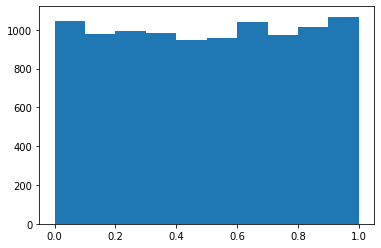

In [ ]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
 
N = 10000
# Generate N random values of unifrom distibution between 0 and 1
data = np.random.rand(N)
 
# Output graph
plt.hist(data)

mean     = st.mean(data)
stdev    = st.stdev(data)
print("Mean: {0:.2f}, Standard deviation: {1:.2f},  1 / sqrt(12) = {2}".format(mean, stdev, 1.0 / np.sqrt(12.0)))

### Practice
- Make random values of a uniform distribution of which mean is 0 and standard deviation is 1.

## Explanation: Uniform distribution with $\mu=0$ and $\sigma=1$

Let $X$ and $Y$ be random variables such that $Y=ax+b$ where $a,b\in \mathbb{R}$. The followings hold:
*  $E[Y]=aE[X]+b$
*  $V[Y]=b^2V[X]$

Since `np.random.rand()` has $\mu=0.5$ and $\sigma=\frac{1}{\sqrt{12}}$, by using $a=\sqrt{12}$ and $b=-0.5\times \sqrt{12}$, we can construct a uniform distribution, having $\mu=0$ and $\sigma=1$.

Mean: 0.01, Standard deviation: 1.00


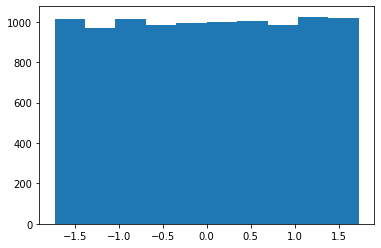

In [ ]:
# Fill after 'data = '
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
 
N = 10000
# Generate N random values of unifrom distibution of which mean is 0 and standard deviation is 1.
data = (np.random.rand(N)-0.5)*math.sqrt(12)
 
# Output graph
plt.hist(data)

mean     = st.mean(data)
stdev    = st.stdev(data)
print("Mean: {0:.2f}, Standard deviation: {1:.2f}".format(mean, stdev))


- Draw graph of a normal distribution.

## Explanation: Normal distribution curve

From the normal distribution formula
$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{(x-\mu)^2}{2 \sigma^2}}$$
by calculating its value at various $x$, we can plot the function as shown in the program below. Note that `np.arange(a,b,x)` create an array of $a, a+x, a+2x, ..., a+kx$ where $k$ is the maximum integer such that $a+kx<b$.

99.9


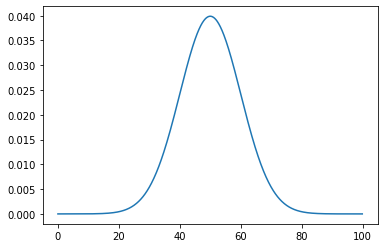

In [ ]:
# Fill after 'pdfn = '
import numpy as np
import matplotlib.pyplot as plt

mean = 50.0
stdv = 10.0
x    = np.arange(0, 100, 0.1)
L=len(x)
pdfn=np.zeros(L)
for k in range(0,L):
  pdfn[k]=np.exp(-((x[k]-mean)**2.)/(2.*(stdv**2.)))/(np.sqrt(2.*np.pi)*stdv) 
plt.plot(x, pdfn)

- Draw graph of a normal distribution and a histgram of random values of normal distribution.

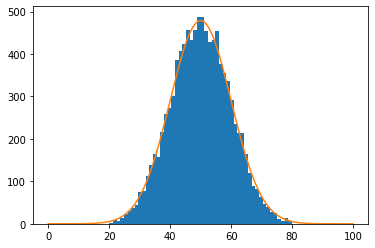

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean = 50.0
stdv = 10.0
N    = 10000

# Generate N random values of normal distibution of average mean and stardard deviation stdv
data = np.random.normal(mean, stdv, N)

# Probability density function of normal distribution
x    = np.arange(0, 100, 0.1)
pdfn = np.exp(-(x - mean) * (x - mean) / (2.0 * stdv * stdv)) / (np.sqrt(2.0 * np.pi) * stdv)

# Output graph
NBin = 50           # Number of bins
RangeBin = [20, 80] # Range of bins
plt.hist(data, NBin, RangeBin)
plt.plot(x, N * (RangeBin[1] - RangeBin[0]) / float(NBin) * pdfn)


### Central limit theorem
- Assume that $X_1,\,X_2,\,\ldots,\, X_M$ are independent random variable of identical distribution.
- Then, 
$$
\frac{X_1+ X_2 + \cdots + X_M}{\sqrt{M}}
$$
converges to a random variable of a normal distribution of which mean and standard deviation are respectively the same as those of original distribution when $M \rightarrow \infty$.

#### Various distribution of which mean is 0 and standard deviation is 1
- Uniform
- $-1$ or $+1$
- Triangle

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,  33.,  56.,  86.,
         97., 139., 181., 221., 226., 259., 297., 331., 329., 360., 426.,
        446., 466., 459., 511., 545., 554., 626., 657., 666., 678., 711.,
        631.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-4.  , -3.84, -3.68, -3.52, -3.36, -3.2 , -3.04, -2.88, -2.72,
        -2.56, -2.4 , -2.24, -2.08, -1.92, -1.76, -1.6 , -1.44, -1.28,
        -1.12, -0.96, -0.8 , -0.64, -0.48, -0.32, -0.16,  0.  ,  0.16,
         0.32,  0.48,  0.64,  0.8 ,  0.96,  1.12,  1.28,  1.44,  1.6 ,
         1.76,  1.92,  2.08,  2.24,  2.4 ,  2.56,  2.72,  2.88,  3.04,
         3.2 ,  3.36,  3.52,  3.68,  3.84,  4.  ]),
 <a list of 50 Patch objects>)

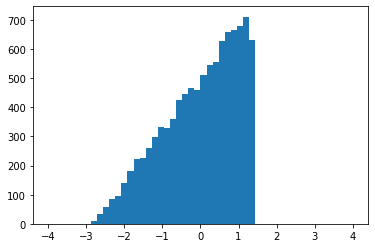

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Unifrom
# data = np.sqrt(12.0) * (np.random.rand(N) - 0.5)
# data = np.sign(np.random.rand(N) - 0.5)
data = np.sqrt(18.0) * (np.sqrt(np.random.rand(N)) - 2.0/3.0)

# Output graph
NBin = 50
RangeBin = [-4, 4]
plt.hist(data, NBin, RangeBin)

### Practice
Draw the histgram of $N$ sum of $M$ random values of various distribution of which mean is 0 and standard deviation is 1 and the graph of probability density function of the starndard normal distribution ($M = 100$ and $N = 10000$). Align hights of the two. 

## Explanation: Central Limit Theorem (CLT)

In the program below, we create $M$ random variables, denoted by $X_1, X_2,... X_m$ following the uniform distribution with $\mu=0$ and $\sigma=1$. Then, we take $N$ values from the random variable

$$\bar{X}=\frac{X_1+X_2+...+X_m}{\sqrt{m}}$$

The result is plotted in a histogram and compared with the normal distribution curve.

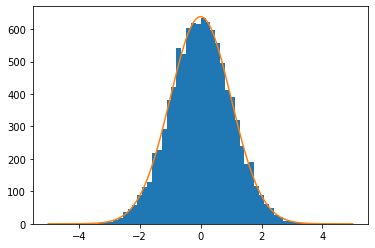

In [ ]:
# Make a program
#### Central limit theorem

import numpy as np
import matplotlib.pyplot as plt

mean = 0.0
stdv = 1.0
N    = 10000
M    = 100

data=np.zeros(N)
for i in range(M):
  data+=np.sqrt(12.0)*(np.random.rand(N)-0.5)
data/=np.sqrt(M)
x=np.arange(-5.0,5.0,0.01)
pdfn=np.exp(-0.5*((x-mean)/stdv)**2.0)/(stdv*(np.sqrt(2.0*np.pi)))

NBin = 50           
RangeBin = [-4, 4] 
plt.hist(data, NBin, RangeBin)
plt.plot(x, N * (RangeBin[1] - RangeBin[0]) / float(NBin) * pdfn)


## File input/output

- `open(filePath, mode)` : to open file.
- `(object of io.TextIOWrapper).write()` : write data to the file.
- `(object of io.TextIOWrapper).readline()` : read a line

### Google Colaboratory 

We make possible to read/write files in Google drive from programs of Google Colaboratory.

* Click the folder icon in the left region.
* A list of file appears and click the folder icon with triangle (the most right of three folder icons.)
* A new following cell appears.
```
from google.colab import drive
drive.mount('/content/drive')
```
* Excute it (Ctrl-Enter) and a new window appears of which content is like.
'''
Go to this URL in a browser: (a very long URL)
Enter your authorization code:
```
* Click the very long URL.
  * Select your Google account.
  * Click `Allow`.
  * Your authorization code will appear.
  * Copy it by clicking the double squre icon.
* Paste it and type `Enter`.

Then, `My Drive` of Google drive is mounted on `/content/drive/` of Google Colaboratory.

* Make a folder to store data.
  * Go to `My Drive` of Google Drive.
  * Click `New`.
  * Select `Folder`.
  * Set the name of folder `APN_data`. 
* We can use file `data1.txt` in `APN_data` as  
`/content/drive/My Drive/APN_data/data1.txt`  
from Google colaboratory.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# File 
import numpy as np
N = 100
with open('/content/drive/My Drive/APN_data/data1.txt', mode='w') as fw:
    fw.write(str(N)+"\n") # \ = Option ¥
    for loop in range(0, N):
        n = int(1000 * np.random.rand())
        fw.write(str(n)+"\n") # \ = Option ¥
        
with open('/content/drive/My Drive/APN_data/data1.txt', mode='r') as fr:
    sVal = fr.readline()
    Nr   = int(sVal)
    data = np.zeros(Nr, dtype='int')
    pos  = 0
    sVal = fr.readline()
    while sVal:
        data[pos] = int(sVal)
        sVal = fr.readline()
        pos += 1

print(data)

[  7 461 115 178  97 120 963 280 887 735 970 290 629 254 870 102  67 120
 452 606 520 799 885 134 875 975 103 266 151 964 677 460 404 824 265   1
 182 668 555 662 783 560 474 891 633 858 526  62 850 941 282 224 877 107
 858 541  87  19 122 713 694  76 715 474 798 766 895 795 968  53 941 820
 231 548 862 799 783 701 824 544  98 138 892 862 259 765 109 616 115 244
 126 787 519 187 654 589  53 267 270 585]


### Practice
- Make a program to read file `data1.txt` in `ndarray` and sort it in both order. (Copy data to another ndarrary before sort.)
- And calculate its mean, variance, standard deviation, and median.

## Explanation: Statistics from the file

The program below read the data from the file `data1.txt` and sort it ascendingly. While it is indeed possible to use selection sort (implemented above) or other sorting algorithms described in the previous lecture, I apply the numpy built-in sorting algorithm `np.sort()` instead for simplicity. Similarly, I also use functions from `statistics` library to calculate mean, standard deviation, and median for the same reason, although it is possible to calculate them manually as in the exercise above.

In [ ]:
# Make a program
import numpy as np
import statistics as st
with open('/content/drive/My Drive/APN_data/data1.txt', mode='r') as fr:
    sVal = fr.readline()
    Nr   = int(sVal)
    data = np.zeros(Nr, dtype='int')
    pos  = 0
    sVal = fr.readline()
    while sVal:
        data[pos] = int(sVal)
        sVal = fr.readline()
        pos += 1

# numpy built-in sorting algorithm
data_sorted=np.sort(data)
# print(data_sorted)

# use functions from statistics to calculate mean, stdev, and median
mean=st.mean(data_sorted)
stdev=st.stdev(data_sorted)
median=st.median(data_sorted)

print("mean = {0}".format(mean))
print("stdev = {0}".format(stdev))
print("median = {0}".format(median))


mean = 504
stdev = 315.2713117300716
median = 546.0
